In [28]:
import numpy as np

from agents.greed_routing_agent import GreedyNeighborsAgent
from environements.random import RandomEnvironement
from agents.sarsa import SARSAAgent
from networks.cycle import cycle_net

import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

In [29]:
def run_experiment(env, agent, epochs):
    
    state = env._state
    sender = env._sender
    reciever = env._reciever
    R = []
    
    for __ in range(epochs):
        # Compute action through Agent's policy
        if __ == 0:
            action = agent.run(state= state, sender= sender, reciever= reciever)
        else:
            action = agent.run(state= state, sender= sender, reciever= reciever, reward= result.reward)

        # State evolution and compute reward
        result = env.run(action= action)
        
        # Update parameters
        state = result.state
        sender = result.sender
        reciever = result.reciever
        
        R.append(result.reward)

    return R

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [32]:
C, Q = cycle_net(n=6, dth=2)
epochs = 10000

In [33]:
e=0.5
a=0.5
y=0.5
sarsa = SARSAAgent(physical_network = C, 
            virtual_network = Q,
            epsilon = e,
            alpha = a,
            gamma = y)

In [34]:
greedy = GreedyNeighborsAgent(physical_network = C, 
                                virtual_network = Q)

In [35]:
env = RandomEnvironement(physical_network = C, 
                                virtual_network = Q)
R_sarsa = run_experiment(env, sarsa, epochs=epochs)

In [36]:
env = RandomEnvironement(physical_network = C, 
                                virtual_network = Q)
R_greedy = run_experiment(env, greedy, epochs=epochs)

In [37]:
mar_period= 1000

MAR_sarsa = moving_average(R_sarsa, mar_period)
MAR_greedy = moving_average(R_greedy, mar_period)

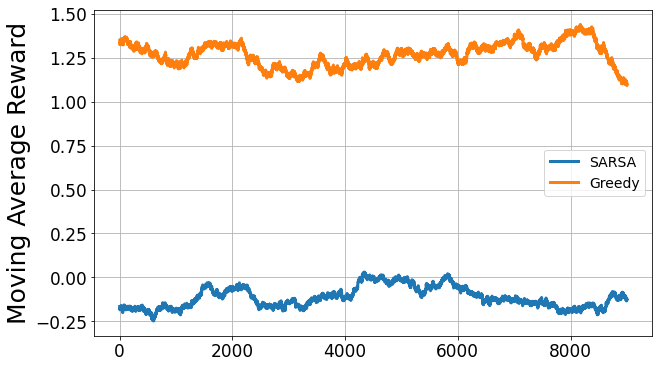

In [38]:
plt.figure(figsize=(10,6))

# plot data
#plt.scatter(range(len(MAR_sarsa)), MAR_sarsa, linewidth=1)
plt.plot(range(len(MAR_sarsa)), MAR_sarsa, linewidth=3, alpha=1, label='SARSA')

#plt.scatter(range(len(MAR_greedy)), MAR_greedy, linewidth=1)
plt.plot(range(len(MAR_greedy)), MAR_greedy, linewidth=3, alpha=1, label='Greedy')

# plot beauty
plt.ylabel('Moving Average Reward', fontsize=25)
plt.xlabel('', fontsize=25)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.legend(fontsize = '14')

plt.show()

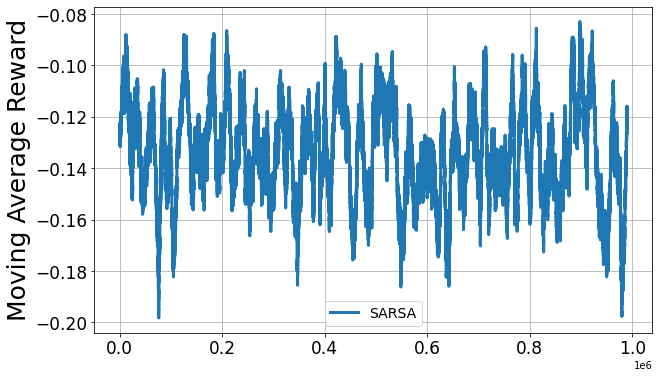

In [27]:
plt.figure(figsize=(10,6))

# plot data
#plt.scatter(range(len(MAR_sarsa)), MAR_sarsa, linewidth=1)
plt.plot(range(len(MAR_sarsa)), MAR_sarsa, linewidth=3, alpha=1, label='SARSA')


# plot beauty
plt.ylabel('Moving Average Reward', fontsize=25)
plt.xlabel('', fontsize=25)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.legend(fontsize = '14')

plt.show()